Qui vediamo due grafici che ci dicono quali sono i 10 migliori e peggiori hotel


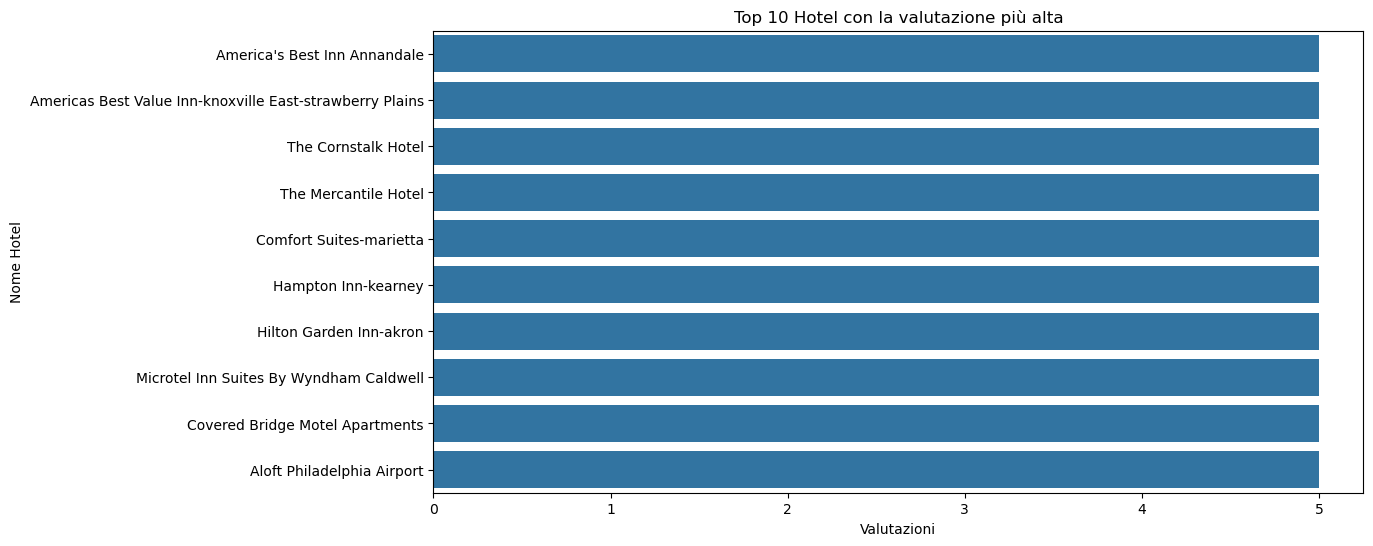

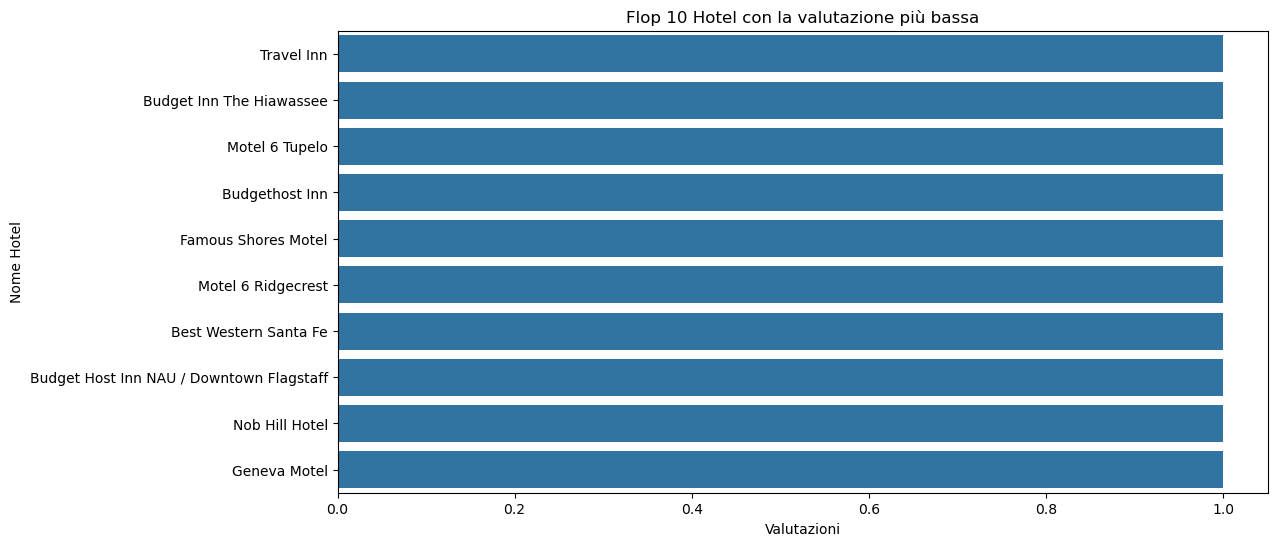

Vediamo adesso quale è la media delle città con più valutazioni e le peggiori
città
Lone Pine      5.0
Little Rock    5.0
McCloud        5.0
McAllen        5.0
Mauston        5.0
Maumee         5.0
Marshall       5.0
Manhattan      5.0
Lyons Falls    5.0
Lynchburg      5.0
Name: recensioni.valutazione, dtype: float64
città
Vienna            1.0
Petoskey          1.0
Butte             1.0
Arkadelphia       1.0
Abilene           1.0
Pomona            1.0
Rosemead          1.0
Shandaken         1.0
Groom             1.0
Jefferson City    1.0
Name: recensioni.valutazione, dtype: float64
Recensioni che contengono 'nice hotel':
                                                   nome  \
1441                                       Oak Tree Inn   
1496                                Coronado Island Inn   
1637                   Hilton Miami Airport Blue Lagoon   
2693               Best Western Plus Concordville Hotel   
2705                               Quality Inn & Suites   
3133            

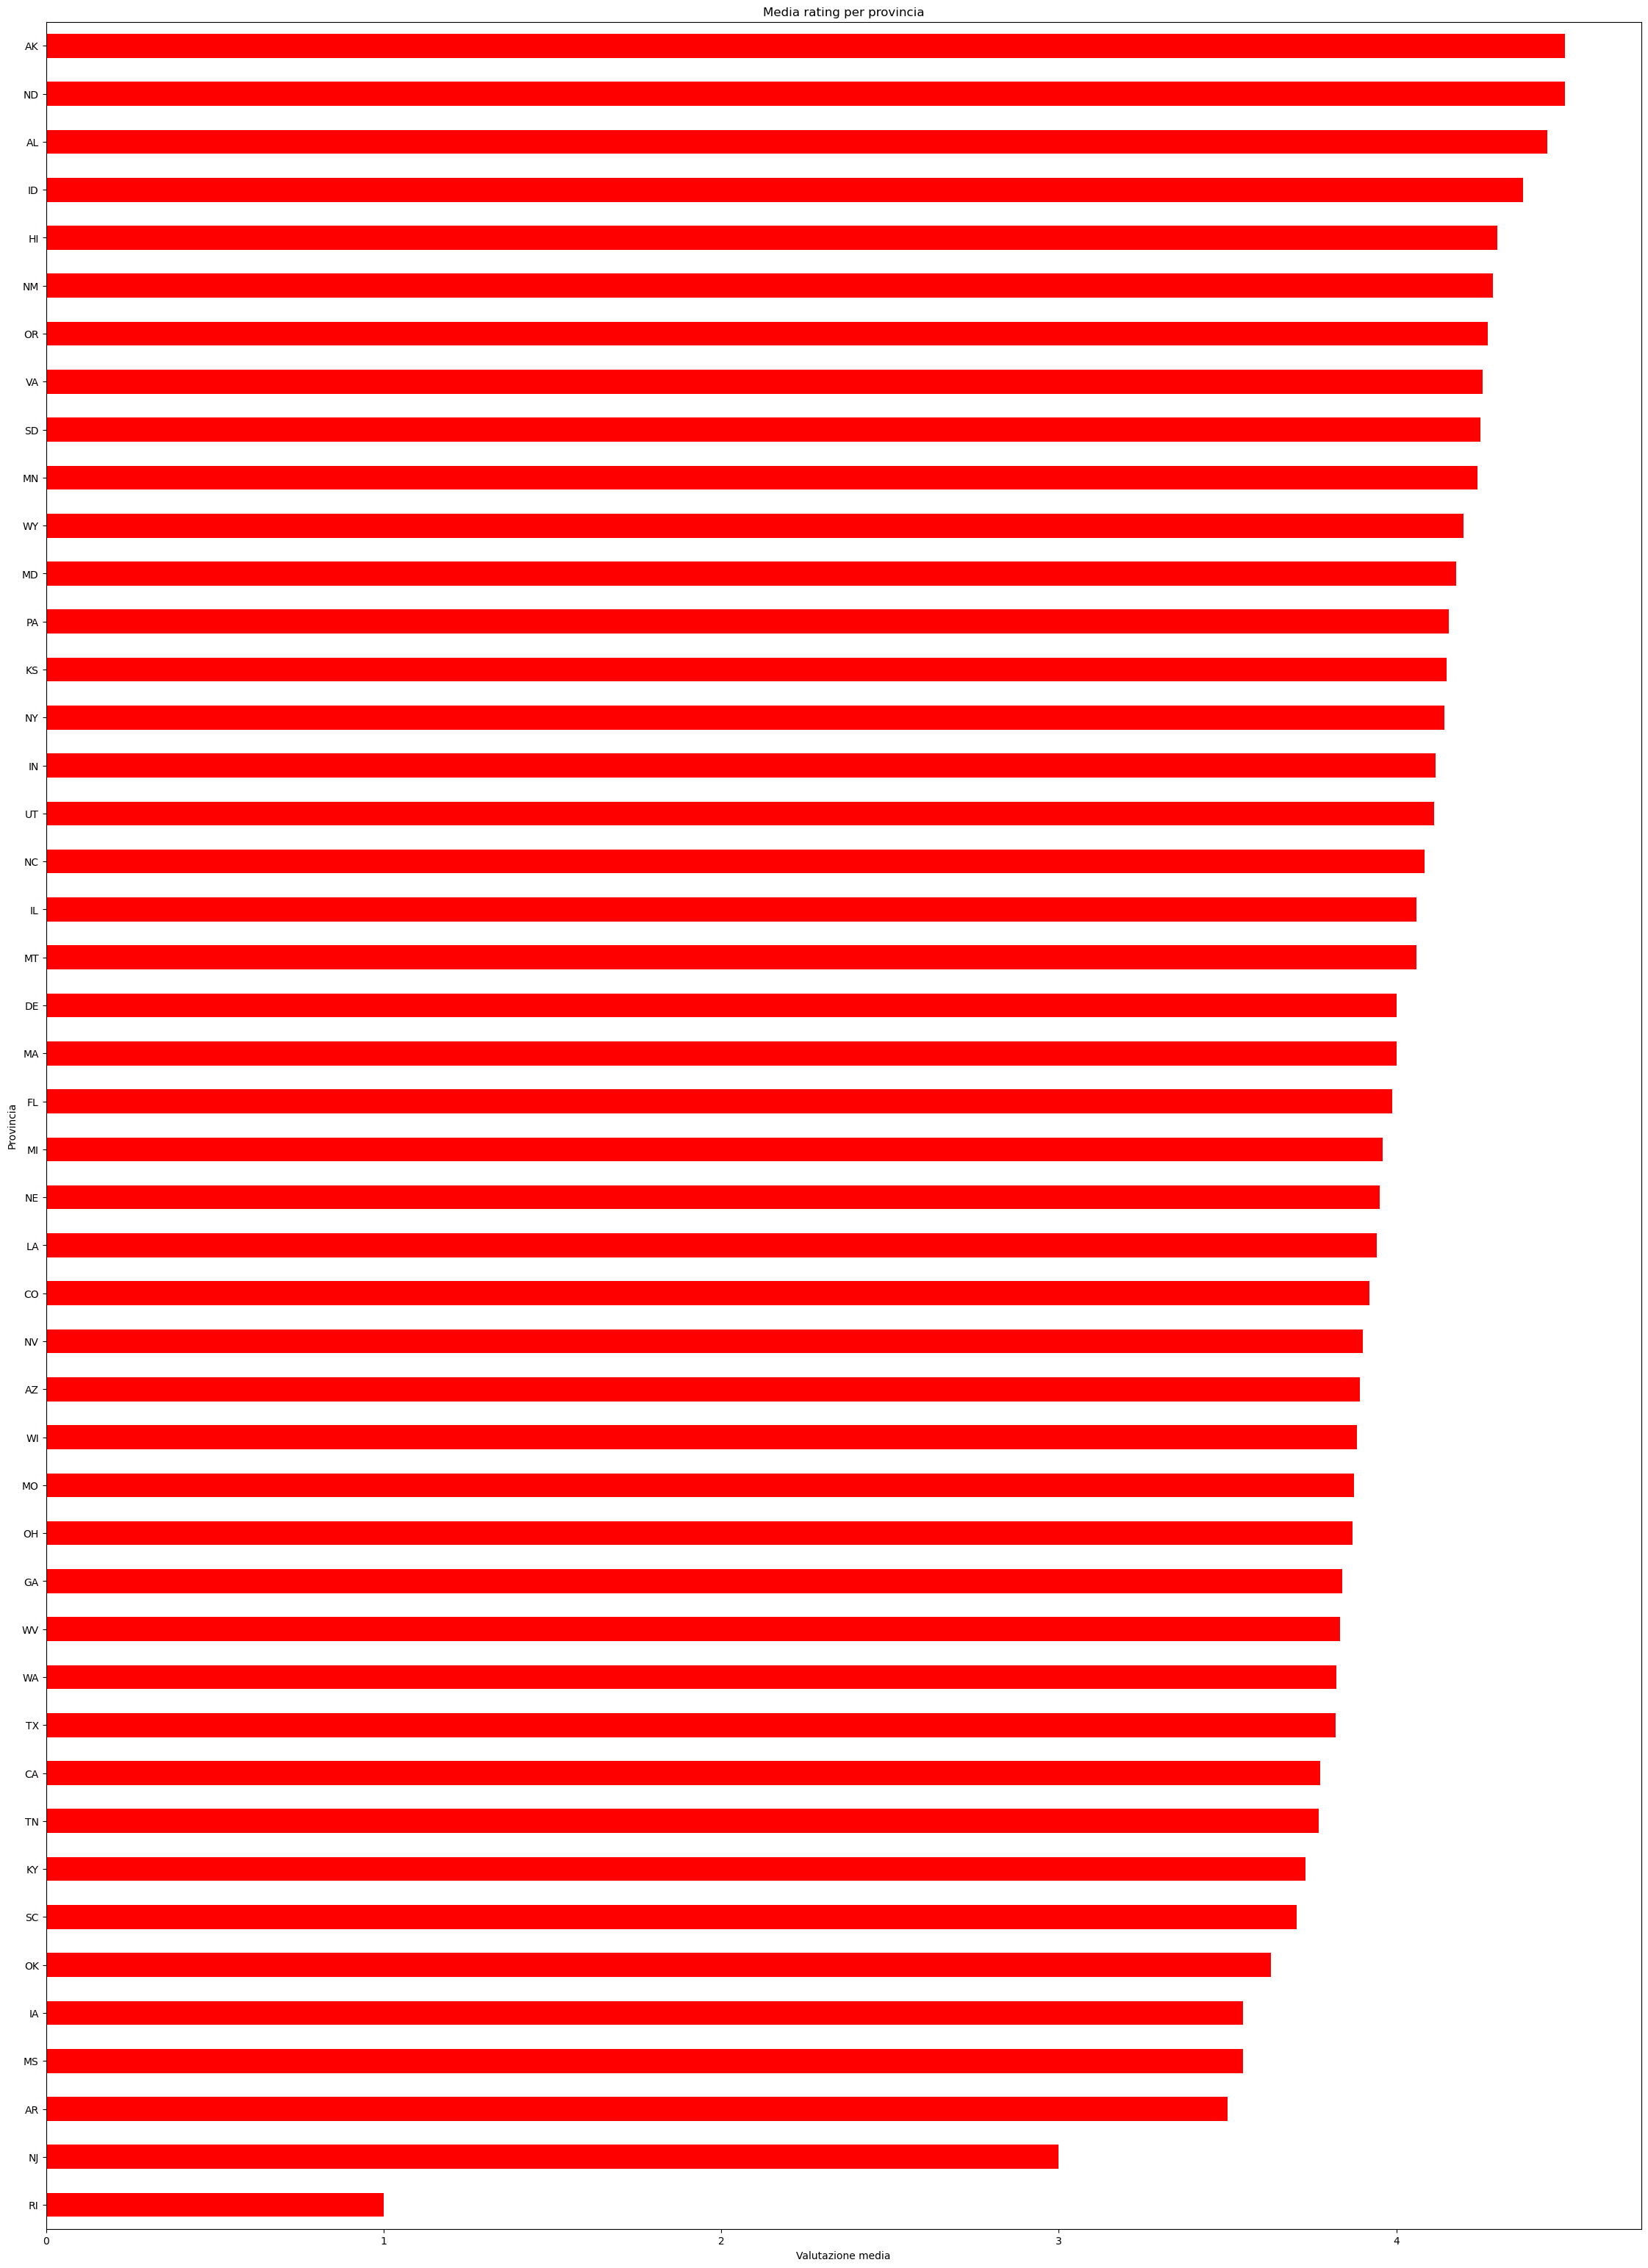

0                  Goleta, CA
1       Carmel by the Sea, CA
5               Lexington, KY
7         Russell Springs, KY
8               Lexington, KY
                ...          
9989           Birmingham, AL
9992               Auburn, AL
9993              Hampton, VA
9998               Hunter, NY
9999              Lindale, TX
Name: città_provincia, Length: 1432, dtype: object


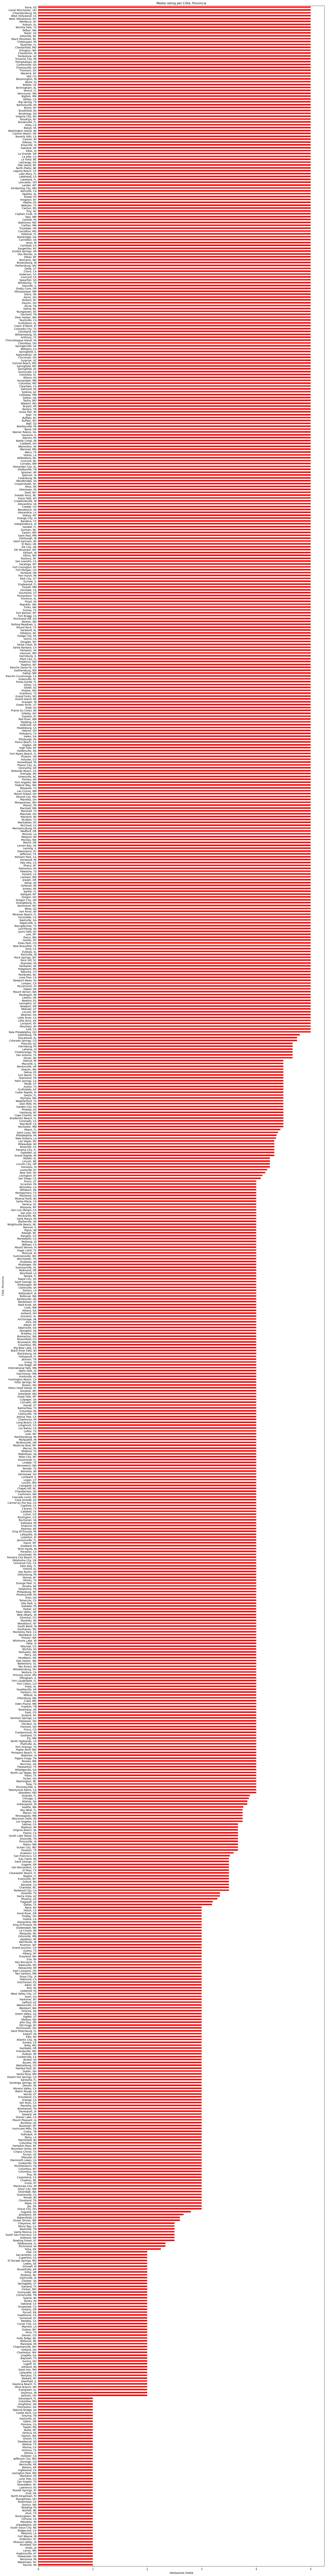

                                              nome  \
10            Hampton Inn Lexington Medical Center   
90                         Corporate Inn Sunnyvale   
91         Marriott Vacation Club Pulse, San Diego   
105   Four Points by Sheraton San Diego - SeaWorld   
152       Courtyard by Marriott San Diego Old Town   
...                                            ...   
9470                     Knights Inn Market Center   
9519         Hampton Inn & Suites Pasco/tri-cities   
9525                                   Quality Inn   
9558      Hampton Inn & Suites Orlando at SeaWorld   
9999                     Hampton Inn-lindale/tyler   

                                       recensioni.testo  
10    This is a new Hampton Inn and is well decorate...  
90    Room was very clean and well appointed. Everyt...  
91    We were at the Club Pulse for just one night. ...  
105   If you are driving then this is for you! A bit...  
152   Wonderful staff! Everyone was so nice, as well...  
...

C:\Users\SLK\AppData\Local\Temp\ipykernel_6860\1185037440.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_valutazioni.index, y=media_valutazioni.values, palette=["gray", "green"])


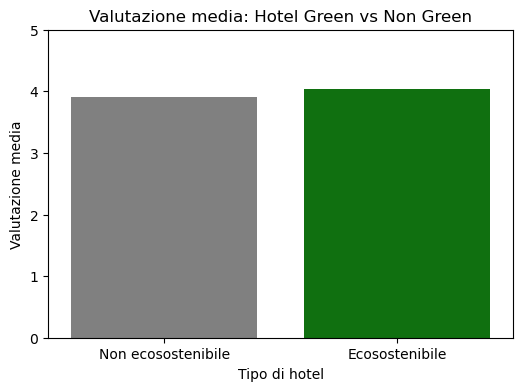

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# CARICAMENTO DATI
df = pd.read_csv("C:/Users/SLK/Desktop/cartella manipolazione dati/Datafiniti_Hotel_Reviews_Jun19.csv")

# RIMOZIONE DUPLICATI CHE SI BASA SU NOME E SITI WEB
df_nuovo = df.drop_duplicates(subset=["nome", "sitiWeb"])

# SELEZIONE DELLE COLONNE UTILI
df_nuovo = df_nuovo[["recensioni.testo", "nome", "città", "provincia", "recensioni.valutazione", "sitiWeb","latitudine","longitudine"]]

#-----------

print("Qui vediamo due grafici che ci dicono quali sono i 10 migliori e peggiori hotel")

# CREA GRAFICO TOP 10 HOTEL
migliori_hotel = df_nuovo[["nome","recensioni.valutazione"]].sort_values(by="recensioni.valutazione", ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=migliori_hotel["recensioni.valutazione"], y=migliori_hotel["nome"])
plt.xlabel("Valutazioni")
plt.ylabel("Nome Hotel")
plt.title("Top 10 Hotel con la valutazione più alta")
plt.show()

# CREA GRAFICO FLOP 10 HOTEL
peggiori_hotel = df_nuovo[["nome","recensioni.valutazione"]].sort_values(by="recensioni.valutazione", ascending=True).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=peggiori_hotel["recensioni.valutazione"], y=peggiori_hotel["nome"])
plt.xlabel("Valutazioni")
plt.ylabel("Nome Hotel")
plt.title("Flop 10 Hotel con la valutazione più bassa")
plt.show()

#-----------

print("Vediamo adesso quale è la media delle città con più valutazioni e le peggiori")

# MEDIA RATING CITTA
media_rating_citta = df_nuovo.groupby("città")["recensioni.valutazione"].mean().sort_values(ascending=False)
top10_citta = media_rating_citta.head(10)
print(top10_citta)

flop10_citta = media_rating_citta.tail(10)
print(flop10_citta)

# ESEMPIO: STAMPA RECENSIONI CHE CONTENGONO "nice hotel"
recensioni_nice = df_nuovo[df_nuovo["recensioni.testo"].str.contains("nice hotel", case=False, na=False)]
print("Recensioni che contengono 'nice hotel':")
print(recensioni_nice[["nome", "recensioni.testo"]])

#-----------

# ANALIZZIAMO LA MEDIA DELLE VALUTAZIONI DELLE PROVINCE
media_provincia = df_nuovo.groupby("provincia")["recensioni.valutazione"].mean().sort_values(ascending=False)
top10_provincia = media_provincia.head(10)
print("Top 10 province per valutazione media:")
print(top10_provincia)

flop10_provincia = media_provincia.tail(10)
print("Flop 10 province per valutazione media:")
print(flop10_provincia)

plt.figure(figsize=(28, 39))  
media_provincia.sort_values(ascending=True).plot(kind="barh", color="red") 
plt.title("Media rating per provincia")
plt.xlabel("Valutazione media")
plt.ylabel("Provincia")
print("Qui possiamo visualizzare tutte le province e le loro valutazioni")
plt.show()

#-----------

# CREAZIONE COLONNA "città_provincia"
df_nuovo["città_provincia"] = df_nuovo["città"] + ", " + df_nuovo["provincia"]
print(df_nuovo["città_provincia"])

città_provincia = df_nuovo.groupby("città_provincia")["recensioni.valutazione"].mean().sort_values(ascending=False)
città_provincia.sort_values(ascending=True).plot(kind="barh", color="red", figsize=(20, 180))

plt.title("Media rating per Città, Provincia")
plt.xlabel("Valutazione media")
plt.ylabel("Città, Provincia")
plt.show()

#-----------
#CREAZIONE NUOVA DF RAGGRUPPANDO VARI CRITERI 
province_piu_popolate = df_nuovo["città"].value_counts().head(10).index.tolist()
citta = (
    df_nuovo[df_nuovo["città"].isin(province_piu_popolate)]
    .groupby("città")["recensioni.valutazione"]
    .agg(["mean", "median"])
    .sort_values("mean", ascending=False)
)
# CREIAMO IL GRAFICO

plt.figure(figsize=(7, 7))
plt.scatter(citta["median"], citta["mean"], color="blue")

min_valore = min(citta["median"].min(), citta["mean"].min())
max_valore = max(citta["median"].max(), citta["mean"].max())
plt.plot([min_valore, max_valore], [min_valore, max_valore], "--", color="gray")

#TRAMITE IL CICLO MIGIORIAMO LA LEGGIBILITA DELLE CITTA
for citta, row in citta.iterrows():
    plt.text(
        row["median"] + 0.03, 
        row["mean"] + 0.03, 
        citta,
        fontsize=8
    )
plt.xlabel("Mediana rating per città")
plt.ylabel("Media rating per città")
plt.title("Media vs Mediana dei rating per le 10 città più popolose")
plt.xlim(min_valore - 0.1, max_valore + 0.1)
plt.ylim(min_valore - 0.1, max_valore + 0.1)
plt.show()


#-----------
#CREAZIONE DI STRINGHE DI DUE VALUTAZIONI 
df_pos = df_nuovo[df_nuovo["recensioni.valutazione"] >= 4]
df_neg = df_nuovo[df_nuovo["recensioni.valutazione"] <= 2]

# CREAZIONE RECENZIONE POSITIVE E NEGATIVE
pos_count = df_pos.groupby("nome").size().rename("recensioni_positive")
neg_count = df_neg.groupby("nome").size().rename("recensioni_negative")

counts = pd.concat([pos_count, neg_count], axis=1)

# PRENDIAMO I TOP E I FLOP RECENSIONI 
top5_pos = counts.sort_values("recensioni_positive", ascending=False).head(5)
top5_neg = counts.sort_values("recensioni_negative", ascending=False).head(5)

print("5 hotel con più recensioni POSITIVE:")
print(top5_pos, "\n")

print("5 hotel con più recensioni NEGATIVE:")
print(top5_neg)
#-----------
# TROVIAMO LE MIGLIORI CITTA RECENSITE
top_citta = df_nuovo["città"].value_counts().head(10).index.tolist()

# CREIAMO IL GRAFICO
plt.figure(figsize=(12,6))
sns.boxplot(x="recensioni.valutazione", y="città", data=df_nuovo[df_nuovo["città"].isin(top_citta)])
plt.title("Distribuzione delle valutazioni nelle 10 città con più recensioni")
plt.xlabel("Valutazione")
plt.ylabel("Città")
plt.show()
#-----------
# CREAZIONE LISTA DI PAROLE CHIAVE LEGATE ALLA SOSTENIBILITÀ
parole_chiave = ["eco", "green", "sustainable", "organic", "environment", "nature", "recycle", "energy", "solar", "biodiversity"]
parole_chiave_regex = "|".join(parole_chiave)

# FILTRO RECENSIONI CON PAROLE CHIAVE
df_sostenibili = df_nuovo[df_nuovo["recensioni.testo"].str.contains(parole_chiave_regex, case=False, na=False)]

# STAMPA HOTEL E RECENSIONI GREEN
print(df_sostenibili[["nome", "recensioni.testo"]])

# CONTEGGIO HOTEL CON ALMENO UNA RECENSIONE SOSTENIBILE
hotel_con_recensioni_sostenibili = df_sostenibili["nome"].nunique()
print(f"Numero di hotel con almeno una recensione sostenibile: {hotel_con_recensioni_sostenibili}")

hotel_sostenibili = df_sostenibili["nome"].unique()
print("Questi sono gli hotel con almeno una recensione sostenibile:")
for hotel in hotel_sostenibili:
    print(hotel)

# QUANTE RECENSIONI TOTALI SONO GREEN
green = df_nuovo[df_nuovo["recensioni.testo"].str.contains(parole_chiave_regex, case=False, na=False)]
num_green = len(green)
print("Recensioni green:", num_green)
num_tot = len(df_nuovo)
print("Totale recensioni:", num_tot)

#-----------

# CREA COLONNA "green" PER IDENTIFICARE HOTEL GREEN
hotel_green = df_sostenibili["nome"].unique()
df_nuovo["green"] = df_nuovo["nome"].isin(hotel_green)

# CALCOLO MEDIA VALUTAZIONI PER HOTEL GREEN/NON GREEN
media_valutazioni = df_nuovo.groupby("green")["recensioni.valutazione"].mean()
media_valutazioni.index = ["Non ecosostenibile", "Ecosostenibile"]

plt.figure(figsize=(6,4))
sns.barplot(x=media_valutazioni.index, y=media_valutazioni.values, palette=["gray", "green"])
plt.title("Valutazione media: Hotel Green vs Non Green")
plt.ylabel("Valutazione media")
plt.xlabel("Tipo di hotel")
plt.ylim(0, 5)
plt.show()


